In [1]:
# Import Libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Specify transforms using torchvision.transforms as transforms
# library

In [2]:
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Load in each dataset and apply transformations using
# the torchvision.datasets as datasets library

In [3]:
train_set = datasets.ImageFolder("D:/all_Bringal/train", transform = transformations)

In [4]:
val_set = datasets.ImageFolder("D:/all_Bringal/valid", transform = transformations)

In [5]:
test_set = datasets.ImageFolder("D:/all_Bringal/test", transform = transformations)

In [ ]:
# Put into a Dataloader using torch library

In [6]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

In [7]:
val_loader = torch.utils.data.DataLoader(val_set, batch_size =32, shuffle=True)

In [8]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size =32, shuffle=True)

In [9]:
model = models.densenet161(pretrained=True)

C:\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [10]:
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

)


In [ ]:
# Turn off training for their parameters

In [11]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# Create new classifier for model using torch.nn as nn library

In [12]:
# We have to use this when we take densenet model
classifier = nn.Sequential(nn.Linear(2208, 1024),
                           nn.ReLU(),
                           nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Linear(512, 3),
                           nn.LogSoftmax(dim=1))

In [19]:
# Replace default classifier with new classifier

In [13]:
model.classifier = classifier

In [ ]:
# Find the device available to use using torch library

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Move model to the device specified above

In [15]:
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

In [ ]:
# Set the error function using torch.nn as nn library

In [16]:
criterion = nn.NLLLoss()

In [ ]:
# Set the optimizer function using torch.optim as optim library

In [17]:
optimizer = optim.Adam(model.classifier.parameters())

In [18]:
epochs = 10
since = time.time()
#best_model_wts = copy.deepcopy(model.state_dict())
for epoch in range(epochs):
    train_loss = 0
    val_loss = 0
    accuracy = 0
    
    # Training the model
    model.train()
    counter = 0
    for inputs, labels in train_loader:
        # Move to device
        inputs, labels = inputs.to(device), labels.to(device)
        # Clear optimizers
        optimizer.zero_grad()
        # Forward pass
        output = model.forward(inputs)
        # Loss
        loss = criterion(output, labels)
        # Calculate gradients (backpropogation)
        loss.backward()
        # Adjust parameters based on gradients
        optimizer.step()
        # Add the loss to the training set's rnning loss
        train_loss += loss.item()*inputs.size(0)
        
        # Print the progress of our training
        counter += 1
        print(counter, "/", len(train_loader))
        
    # Evaluating the model
    model.eval()
    counter = 0
    # Tell torch not to calculate gradients
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move to device
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            output = model.forward(inputs)
            # Calculate Loss
            valloss = criterion(output, labels)
            # Add loss to the validation set's running loss
            val_loss += valloss.item()*inputs.size(0)
            
            # Since our model outputs a LogSoftmax, find the real 
            # percentages by reversing the log function
            output = torch.exp(output)
            # Get the top class of the output
            top_p, top_class = output.topk(1, dim=1)
            # See how many of the classes were correct?
            equals = top_class == labels.view(*top_class.shape)
            # Calculate the mean (get the accuracy for this batch)
            # and add it to the running accuracy for this epoch
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            
            # Print the progress of our evaluation
            counter += 1
            print(counter, "/", len(val_loader))
    
    # Get the average loss for the entire epoch
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = val_loss/len(val_loader.dataset)
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    # Print out the information
    print('Accuracy: ', accuracy/len(val_loader))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

1 / 67
2 / 67
3 / 67
4 / 67
5 / 67
6 / 67
7 / 67
8 / 67
9 / 67
10 / 67
11 / 67
12 / 67
13 / 67
14 / 67
15 / 67
16 / 67
17 / 67
18 / 67
19 / 67
20 / 67
21 / 67
22 / 67
23 / 67
24 / 67
25 / 67
26 / 67
27 / 67
28 / 67
29 / 67
30 / 67
31 / 67
32 / 67
33 / 67
34 / 67
35 / 67
36 / 67
37 / 67
38 / 67
39 / 67
40 / 67
41 / 67
42 / 67
43 / 67
44 / 67
45 / 67
46 / 67
47 / 67
48 / 67
49 / 67
50 / 67
51 / 67
52 / 67
53 / 67
54 / 67
55 / 67
56 / 67
57 / 67
58 / 67
59 / 67
60 / 67
61 / 67
62 / 67
63 / 67
64 / 67
65 / 67
66 / 67
67 / 67
1 / 9
2 / 9
3 / 9
4 / 9
5 / 9
6 / 9
7 / 9
8 / 9
9 / 9
Training complete in 2m 46s
Accuracy:  0.9266203708118863
Epoch: 0 	Training Loss: 0.395907 	Validation Loss: 0.214411
1 / 67
2 / 67
3 / 67
4 / 67
5 / 67
6 / 67
7 / 67
8 / 67
9 / 67
10 / 67
11 / 67
12 / 67
13 / 67
14 / 67
15 / 67
16 / 67
17 / 67
18 / 67
19 / 67
20 / 67
21 / 67
22 / 67
23 / 67
24 / 67
25 / 67
26 / 67
27 / 67
28 / 67
29 / 67
30 / 67
31 / 67
32 / 67
33 / 67
34 / 67
35 / 67
36 / 67
37 / 67
38 / 67
39 / 

In [68]:
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

In [ ]:
# Test the model

In [22]:
# Test the model
#was_training = model.training
#model_ft.eval()
with torch.no_grad():
    correct = 0
    total = 0
    since = time.time()
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 120 test images: {} %'.format((correct / total) * 100))
    time_elapsed = time.time() - since
    print('Testing complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

# Save the model and plot
torch.save(model.state_dict(), 'conv_net_model11.ckpt')

# p = figure(y_axis_label='Loss', width=850, y_range=(0, 1), title='PyTorch ConvNet results')
# p.extra_y_ranges = {'Accuracy': Range1d(start=0, end=100)}
# p.add_layout(LinearAxis(y_range_name='Accuracy', axis_label='Accuracy (%)'), 'right')
# p.line(np.arange(len(loss_list)), loss_list)
# p.line(np.arange(len(loss_list)), np.array(acc_list) * 100, y_range_name='Accuracy', color='red')

Test Accuracy of the model on the 120 test images: 91.98113207547169 %
Testing complete in 0m 4s


In [86]:
# Process the image
def process_image(img):
    # Load Image
    #img = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [44]:
# Using model to predict the label
def predict(image, model):
    # Pass the image through model
    image = image.to(device)
    output = model.forward(image)
    
    # Reverse the log function in output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()

In [45]:
# Show Image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

In [48]:
# Call the Tif2RGB function
image_rgb = Tif2RGB("D:/all_Bringal/test/Brinjal/Patch3_50m.593.tif")

In [63]:
print(image_rgb.size)

(9611, 7915)


In [33]:
# Process Image
image = process_image(image_rgb)

In [91]:
image_im=Image.open("D:/jio_kisan_120m/Patch1/Patch1120m_Ortho.tif")

print(image_im.size)

(9611, 7915)


In [47]:
def Tif2RGB(path):
    image=Image.open(path)
    a, b = image.size
    #convert to array
    li_r=list(image.getdata(band=0))
    arr_r=np.array(li_r,dtype="uint8")
    li_g=list(image.getdata(band=1))
    arr_g=np.array(li_g,dtype="uint8")
    li_b=list(image.getdata(band=2))
    arr_b=np.array(li_b,dtype="uint8")

    # reshape 
    reshaper=arr_r.reshape(b,a) #size flipped so it reshapes correctly
    reshapeb=arr_b.reshape(b,a)
    reshapeg=arr_g.reshape(b,a)

    imr=Image.fromarray(reshaper,mode=None) # mode I
    imb=Image.fromarray(reshapeb,mode=None)
    img=Image.fromarray(reshapeg,mode=None)

    #merge
    merged=Image.merge("RGB",(imr,img,imb))
    return merged
#     merged.save('D://jio_kisan_120m//Patch1//out2.png')
#     merged.show()

In [ ]:
# Give image to model to predict output
top_prob, top_class = predict(image, model)

In [ ]:
# Show the image
show_image(image)

In [ ]:
def check_class(top_class):
    if top_class == 0:
        return "Brinjal"
    elif top_class ==1:
        return "Others"
    else:
        return "Tapioca"

In [ ]:
# Print the results
    
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", check_class(top_class)  )
#print("Predicted Class is :-", check_class(top_class))

In [49]:
from PIL import Image, ImageOps

In [50]:
# Padding Operation
def padding(image1):
    a, b = image1.size
    padding = (a//2, b//2, a-(a//2), b-(b//2))
    new_im = ImageOps.expand(image1, padding)
    return new_im
    




In [51]:
image_pad = padding(image_rgb)

In [62]:
print(image_pad.size)

(19222, 15830)


In [93]:
kar_s=244
stride=224
kar = np.ones((kar_s,kar_s),np.uint8)

In [94]:
tic=time.time()
counter1 = 0
counter2 = 0
counter3 = 0
for i in range(0,image_im.size[0]-(kar_s-1),stride):
    print(i)
    for j in range(0,image_im.size[1]-(kar_s-1),stride):
        r_m1=image_im[i:i+kar_s,j:j+kar_s]
        print(r_m1.size)
        image = process_image(r_m1)
        # Give image to model to predict output
        top_prob, top_class = predict(image, model)
        rm = check_class(top_class)
        if rm == Brinjal:
            counter1 = counter + 1
        elif rm == Tapioca:
            counter2 = counter + 1
        else:
            counter3 = counter + 1
        print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", check_class(top_class)  )
        
toc=time.time ()
print("Counter1 Value = ", counter1)
print("Counter2 Value = ", counter2)
print("Counter3 Value = ", counter3)
print((toc-tic)/60)

0


TypeError: 'TiffImageFile' object is not subscriptable

In [105]:
import numpy as np
from osgeo import gdal
#import sys
#import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.misc import toimage
import cv2
from PIL import Image, ImageEnhance
import time
from scipy.misc import imresize, imread, imshow

In [98]:
ds=gdal.Open("D:/jio_kisan_120m/Patch1/Patch1120m_Ortho.tif")
print("[RASTER BAND COUNT]:",ds.RasterCount)

[RASTER BAND COUNT]: 4


In [99]:
class Normalize(object):
    """
    Normalize an tensor image with mean and standard deviation.
    Given mean: (R, G, B) and std: (R, G, B),
    will normalize each channel of the torch.*Tensor, i.e.
    channel = (channel - mean) / std
    Args:
        mean (sequence): Sequence of means for R, G, B channels respecitvely.
        std (sequence): Sequence of standard deviations for R, G, B channels
            respecitvely.
    """

    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        # TODO: make efficient
        for t, m, s in zip(tensor, self.mean, self.std):
            t.sub_(m).div_(s)
        return tensor

In [100]:
R = ds.GetRasterBand(1).ReadAsArray()
G= ds.GetRasterBand(2).ReadAsArray()
B = ds.GetRasterBand(3).ReadAsArray()
r, g, b=R, G, B

print(R.shape, r.shape)

(7915, 9611) (7915, 9611)


In [101]:
kar_s=224
stride=224
kar = np.ones((kar_s,kar_s),np.uint8)

In [102]:
#####################PADDING##########################
########################RED PADDING#####################
r=np.concatenate((r,np.zeros((kar_s,r.shape[1]),dtype=int)),axis=0)
r=np.concatenate((r,np.zeros((r.shape[0],kar_s),dtype=int)),axis=1)
########################GREEN PADDING#####################
g=np.concatenate((g,np.zeros((kar_s,g.shape[1]),dtype=int)),axis=0)
g=np.concatenate((g,np.zeros((g.shape[0],kar_s),dtype=int)),axis=1)
########################BLUE PADDING#####################
b=np.concatenate((b,np.zeros((kar_s,b.shape[1]),dtype=int)),axis=0)
b=np.concatenate((b,np.zeros((b.shape[0],kar_s),dtype=int)),axis=1)

In [103]:
from PIL import Image
import numpy as np
im1 = np.zeros((r.shape[0],r.shape[1],3),'uint8')
#rgbArray = np.zeros((R.shape[0],R.shape[1],3),'uint8')
im1[..., 0] = r[0:r.shape[0],0:r.shape[1]]
im1[..., 1] = g[0:r.shape[0],0:r.shape[1]]
im1[..., 2] = b[0:r.shape[0],0:r.shape[1]]

In [107]:
def batch_rgb_to_bgr(batch):
    #print(batch.size())
    (r, g, b) = torch.chunk(batch, 3, 1)
    #print(r.size())
    batch1 = torch.cat((b, g, r),1)
    #print(batch1.size())
    return batch1

In [111]:
######################################YELLOW COLOR DETECTION MEDIAN################################
tic=time.time()
counter1 = 0
counter2 = 0
counter3 = 0
for i in range(0,im1.shape[0]-(kar_s-1),stride):
    print(i)
    for j in range(0,im1.shape[1]-(kar_s-1),stride):
        r_m1=im1[i:i+kar_s,j:j+kar_s]
        test = imresize(r_m1,(224,224,3))
        test = test.transpose(2,0,1) 
        test = np.reshape(test,(1,3,224,224)) 
        test = test.astype(np.float32)
        testPT = torch.from_numpy(test).float()
        testPT = batch_rgb_to_bgr(testPT) 
        testPT = torch.div(testPT,255.0)
        mn = [0.406,0.456,0.485]
        sd = [0.225,0.224,0.229]
        norm = Normalize(mn,sd) 
        testPT = norm(testPT)
        top_prob, top_class = predict(testPT, model)
        rm = check_class(top_class)
        if rm == "Brinjal":
            counter1 = counter1 + 1
        elif rm == "Tapioca":
            counter2 = counter2 + 1
        else:
            counter3 = counter3 + 1
        print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", check_class(top_class)  )
        
toc=time.time ()
print("Counter1 Value = ", counter1)
print("Counter2 Value = ", counter2)
print("Counter3 Value = ", counter3)
print((toc-tic)/60)

0


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted cla

The model is  99.83267784118652 % certain that the image has a predicted class of  Others
The model is  99.99942183494568 % certain that the image has a predicted class of  Others
The model is  99.99790787696838 % certain that the image has a predicted class of  Others
The model is  99.98579025268555 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  10

The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
1120
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicte

The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  99.99990463256836 % certain that the image has a predicted class of  Others
The model is  99.95542764663696 % certain that the image has a predicted class of  Others
The model is  91.50475263595581 % certain that the image has a predicted class of  Others
The model is  99.73684549331665 % certain that the image has a predicted class of  Others
The model is  99

The model is  98.17683100700378 % certain that the image has a predicted class of  Others
The model is  79.93902564048767 % certain that the image has a predicted class of  Others
The model is  98.76925945281982 % certain that the image has a predicted class of  Others
The model is  99.86656904220581 % certain that the image has a predicted class of  Others
The model is  54.56392168998718 % certain that the image has a predicted class of  Brinjal
The model is  52.42447257041931 % certain that the image has a predicted class of  Brinjal
The model is  92.28578209877014 % certain that the image has a predicted class of  Others
The model is  99.98598098754883 % certain that the image has a predicted class of  Others
The model is  99.94422793388367 % certain that the image has a predicted class of  Others
The model is  99.96481537818909 % certain that the image has a predicted class of  Others
The model is  99.55984950065613 % certain that the image has a predicted class of  Others
The mode

The model is  99.96457695960999 % certain that the image has a predicted class of  Others
The model is  99.94431734085083 % certain that the image has a predicted class of  Others
The model is  99.99446868896484 % certain that the image has a predicted class of  Others
The model is  99.99045729637146 % certain that the image has a predicted class of  Others
The model is  99.96757507324219 % certain that the image has a predicted class of  Others
The model is  99.9375581741333 % certain that the image has a predicted class of  Others
The model is  99.98679161071777 % certain that the image has a predicted class of  Others
The model is  99.9809741973877 % certain that the image has a predicted class of  Others
The model is  99.70541596412659 % certain that the image has a predicted class of  Others
The model is  99.97825622558594 % certain that the image has a predicted class of  Others
The model is  99.70431923866272 % certain that the image has a predicted class of  Others
The model is

The model is  99.98078346252441 % certain that the image has a predicted class of  Others
The model is  99.68273639678955 % certain that the image has a predicted class of  Others
The model is  99.9613344669342 % certain that the image has a predicted class of  Others
The model is  99.96834397315979 % certain that the image has a predicted class of  Others
The model is  99.23573136329651 % certain that the image has a predicted class of  Others
The model is  99.95142221450806 % certain that the image has a predicted class of  Others
The model is  99.98021721839905 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
3136
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a pre

The model is  99.95933175086975 % certain that the image has a predicted class of  Others
The model is  99.97048377990723 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
3584
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  99.99451637268066 % certain that the image has a predicted class of  Others
The model is  99.98030662536621 % certain that the image has a predicted class of  Others
The model is  99.4652271270752 % certain that the image has a predicted class of  Others
The model is  99.70816969871521 % certain that the image has a predicted class of  Others
The model is  99.71002340316772 % certain that the image has a pre

The model is  99.96686577796936 % certain that the image has a predicted class of  Others
The model is  99.99637603759766 % certain that the image has a predicted class of  Others
The model is  99.71725940704346 % certain that the image has a predicted class of  Others
The model is  98.25379848480225 % certain that the image has a predicted class of  Others
The model is  99.83343482017517 % certain that the image has a predicted class of  Others
The model is  99.18513298034668 % certain that the image has a predicted class of  Others
The model is  99.92945194244385 % certain that the image has a predicted class of  Others
The model is  98.71716499328613 % certain that the image has a predicted class of  Others
The model is  72.93047904968262 % certain that the image has a predicted class of  Brinjal
The model is  93.16756129264832 % certain that the image has a predicted class of  Others
The model is  88.15265893936157 % certain that the image has a predicted class of  Others
The model

The model is  99.81963038444519 % certain that the image has a predicted class of  Others
The model is  99.87947940826416 % certain that the image has a predicted class of  Others
The model is  98.32825064659119 % certain that the image has a predicted class of  Others
The model is  60.5902373790741 % certain that the image has a predicted class of  Others
The model is  66.7054831981659 % certain that the image has a predicted class of  Others
The model is  61.54568791389465 % certain that the image has a predicted class of  Others
The model is  95.24174332618713 % certain that the image has a predicted class of  Others
The model is  89.65474367141724 % certain that the image has a predicted class of  Others
The model is  74.19363856315613 % certain that the image has a predicted class of  Others
The model is  82.59986639022827 % certain that the image has a predicted class of  Others
The model is  55.08642792701721 % certain that the image has a predicted class of  Others
The model is

The model is  96.3245689868927 % certain that the image has a predicted class of  Others
The model is  85.90322136878967 % certain that the image has a predicted class of  Others
The model is  90.32034873962402 % certain that the image has a predicted class of  Others
The model is  99.54038262367249 % certain that the image has a predicted class of  Others
The model is  99.87519383430481 % certain that the image has a predicted class of  Others
The model is  99.96695518493652 % certain that the image has a predicted class of  Others
The model is  99.99460577964783 % certain that the image has a predicted class of  Others
The model is  99.99990463256836 % certain that the image has a predicted class of  Others
The model is  99.99761581420898 % certain that the image has a predicted class of  Others
The model is  99.99375939369202 % certain that the image has a predicted class of  Others
The model is  99.91554021835327 % certain that the image has a predicted class of  Others
The model i

The model is  99.99542832374573 % certain that the image has a predicted class of  Others
The model is  99.99313950538635 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the i

The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
6048
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicte

The model is  99.99980330467224 % certain that the image has a predicted class of  Others
The model is  99.99885559082031 % certain that the image has a predicted class of  Others
The model is  99.99980330467224 % certain that the image has a predicted class of  Others
The model is  99.4436502456665 % certain that the image has a predicted class of  Others
The model is  99.96129274368286 % certain that the image has a predicted class of  Others
The model is  99.97987747192383 % certain that the image has a predicted class of  Others
The model is  99.97639656066895 % certain that the image has a predicted class of  Others
The model is  99.99308586120605 % certain that the image has a predicted class of  Others
The model is  99.99537467956543 % certain that the image has a predicted class of  Others
The model is  99.99646544456482 % certain that the image has a predicted class of  Others
The model is  99.9733030796051 % certain that the image has a predicted class of  Others
The model is

The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted cla

The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
7616
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicted class of  Others
The model is  100.0 % certain that the image has a predicte

In [87]:
tic=time.time()
counter1 = 0
counter2 = 0
counter3 = 0
for i in range(0,im1.shape[0]-(kar_s-1),stride):
    print(i)
    for j in range(0,im1.shape[1]-(kar_s-1),stride):
        r_m1=im1[i:i+kar_s,j:j+kar_s]
        print(r_m1.shape)
        image = process_image(r_m1)
        # Give image to model to predict output
        top_prob, top_class = predict(image, model)
        rm = check_class(top_class)
        if rm == Brinjal:
            counter1 = counter + 1
        elif rm == Tapioca:
            counter2 = counter + 1
        else:
            counter3 = counter + 1
        print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", check_class(top_class)  )
        
toc=time.time ()
print("Counter1 Value = ", counter1)
print("Counter2 Value = ", counter2)
print("Counter3 Value = ", counter3)
print((toc-tic)/60)

0
(224, 224, 3)


ValueError: resize only works on single-segment arrays

In [58]:
# image=Image.open("E:/Crop_Classification_Paper/New folder/Soya_Tiles_Pix4D.134.tif")

# print(image.size) #size is inverted i.e columns first rows second eg: 500,250

# #convert to array
# li_r=list(image.getdata(band=0))
# arr_r=np.array(li_r,dtype="uint8")
# li_g=list(image.getdata(band=1))
# arr_g=np.array(li_g,dtype="uint8")
# li_b=list(image.getdata(band=2))
# arr_b=np.array(li_b,dtype="uint8")

# # reshape 
# reshaper=arr_r.reshape(500,500) #size flipped so it reshapes correctly
# reshapeb=arr_b.reshape(500,500)
# reshapeg=arr_g.reshape(500,500)

# imr=Image.fromarray(reshaper,mode=None) # mode I
# imb=Image.fromarray(reshapeb,mode=None)
# img=Image.fromarray(reshapeg,mode=None)

# #merge
# merged=Image.merge("RGB",(imr,img,imb))
# merged.save('D://jio_kisan_120m//Patch1//out2.png')
# merged.show()

(500, 500)


In [26]:
# def Tif2RGB(path):
#     image=Image.open(path)
#     a, b = image.size
#     #convert to array
#     li_r=list(image.getdata(band=0))
#     arr_r=np.array(li_r,dtype="uint8")
#     li_g=list(image.getdata(band=1))
#     arr_g=np.array(li_g,dtype="uint8")
#     li_b=list(image.getdata(band=2))
#     arr_b=np.array(li_b,dtype="uint8")

#     # reshape 
#     reshaper=arr_r.reshape(b,a) #size flipped so it reshapes correctly
#     reshapeb=arr_b.reshape(b,a)
#     reshapeg=arr_g.reshape(b,a)

#     imr=Image.fromarray(reshaper,mode=None) # mode I
#     imb=Image.fromarray(reshapeb,mode=None)
#     img=Image.fromarray(reshapeg,mode=None)

#     #merge
#     merged=Image.merge("RGB",(imr,img,imb))
#     return merged
# #     merged.save('D://jio_kisan_120m//Patch1//out2.png')
# #     merged.show()
    

In [34]:
# Give image to model to predict output
top_prob, top_class = predict(image, model)

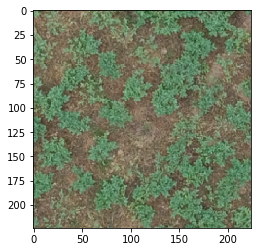

In [35]:
# Show the image
show_image(image)

In [36]:
def check_class(top_class):
    if top_class == 0:
        return "Brinjal"
    elif top_class ==1:
        return "Others"
    else:
        return "Tapioca"

In [37]:
# Print the results
    
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", check_class(top_class)  )
#print("Predicted Class is :-", check_class(top_class))

The model is  99.99990463256836 % certain that the image has a predicted class of  Brinjal
